### 모두를 위한 머신러닝/딥러닝 강의
김성훈 교수님의 모두를 위한 머신러닝/딥러닝 강의 중 lab 강의 코드입니다.
## Lab11_1 CNN Basics

### default gray-scale image

In [1]:
import os, sys
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

(1, 3, 3, 1)


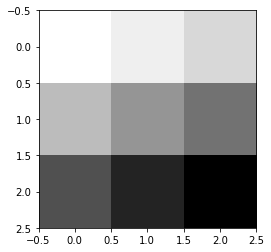

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]], dtype = np.float32)
print(image.shape) # (# of image, Height, Width, channel)
plt.imshow(image.reshape(3,3), cmap = 'Greys')

###  Simple convolution layer
padding option에 관한 논의는 아래의 링크를 참고  
https://github.com/tensorflow/tensorflow/issues/4297
#### 1 filter (2,2,1,1) padding : VALID
Image : (1, 3, 3, 1) shape  
Filter : (2, 2, 1, 1) shape  
Stride : 1 x 1  
Padding : VALID

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


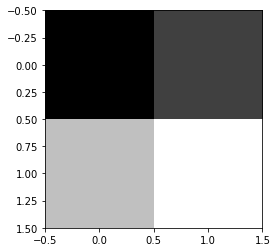

In [3]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])  
print('weight.shape', weight.shape) # (Height, Width, Channel, # of filters)
conv2d = tf.nn.conv2d(input = image, filter = weight, strides = [1,1,1,1], padding = 'VALID') # Convlution!
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3) # 꼭 필요한 코드는 아닌듯 하다.
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.imshow(one_img.reshape(2,2), cmap = 'gray')

####  1 filter (2,2,1,1) with padding:SAME
Image : (1, 3, 3, 1) shape  
Filter : (2, 2, 1, 1) shape  
Stride : 1 x 1  
Padding : SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


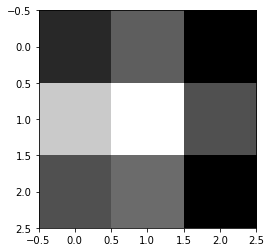

In [4]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])  
print('weight.shape', weight.shape) # (Height, Width, Channel, # of filters)
conv2d = tf.nn.conv2d(input = image, filter = weight, strides = [1,1,1,1], padding = 'SAME') # Convlution!
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3) # 꼭 필요한 코드는 아닌듯 하다.
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.imshow(one_img.reshape(3,3), cmap = 'gray')

#### 3 filter (2,2,1,3) with padding:SAME
Image : (1, 3, 3, 1) shape  
Filter : (2, 2, 1, 3) shape  
Stride : 1 x 1  
Padding : SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


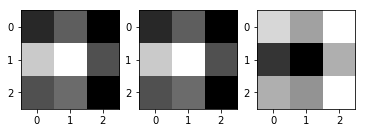

In [5]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(input = image, filter = weight, strides = [1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### Max Pooling
padding option에 관한 논의는 아래의 링크를 참고  
https://github.com/tensorflow/tensorflow/issues/4297

In [6]:
image = np.array([[4,3,2,1]], dtype = np.float32)
image = image.reshape(1,2,2,1)
pool = tf.nn.max_pool(value = image, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


### MNIST example

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


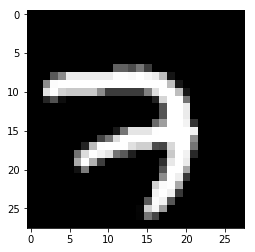

In [8]:
img = mnist.train.images[0].reshape(1,28,28,1)
plt.imshow(img.reshape(28,28), cmap = 'gray')

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


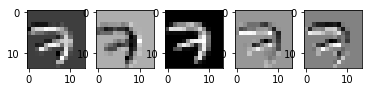

In [9]:
w1 = tf.Variable(initial_value = tf.random_normal(shape = [3,3,1,5], stddev = 0.1))
conv2d = tf.nn.conv2d(input = img, filter = w1, strides = [1,2,2,1], padding = 'SAME') # unit stride일 때만 padding이 가능한 듯함!
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap = 'gray')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


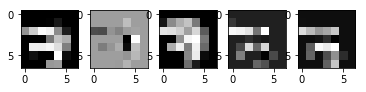

In [10]:
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
print(pool)
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap = 'gray')